In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/customer_churn (1).csv")

In [ ]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
data.dtypes



customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
data.drop('customerID',axis=1,inplace=True)

In [ ]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
data[data["TotalCharges"]==" "].shape


(11, 20)

In [ ]:
data1=data[data["TotalCharges"]!=" "]
data1.shape


(7032, 20)

In [ ]:
data.shape,data1.shape

((7043, 20), (7032, 20))

In [ ]:
data["TotalCharges"],data1.TotalCharges

(0         29.85
 1        1889.5
 2        108.15
 3       1840.75
 4        151.65
          ...   
 7038     1990.5
 7039     7362.9
 7040     346.45
 7041      306.6
 7042     6844.5
 Name: TotalCharges, Length: 7043, dtype: object,
 0         29.85
 1        1889.5
 2        108.15
 3       1840.75
 4        151.65
          ...   
 7038     1990.5
 7039     7362.9
 7040     346.45
 7041      306.6
 7042     6844.5
 Name: TotalCharges, Length: 7032, dtype: object)

In [ ]:
type(data["TotalCharges"]),type(data.TotalCharges)

(pandas.core.series.Series, pandas.core.series.Series)

In [ ]:
data1.TotalCharges=pd.to_numeric(data1.TotalCharges)

<ipython-input-14-a59f8766e9c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.TotalCharges=pd.to_numeric(data1.TotalCharges)


In [ ]:

data1[data1["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
data1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [ ]:
data1.Churn.values

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype=object)

In [ ]:
data1[data1.Churn=="Yes"].shape

(1869, 20)

In [ ]:
data1[data1.Churn=="No"].shape

(5163, 20)

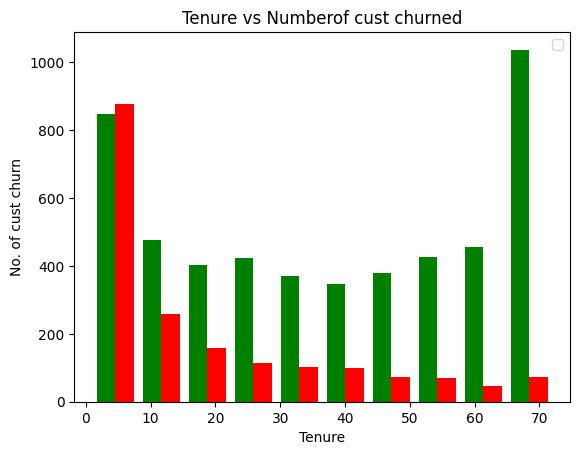

In [ ]:
tenure_data_no=data1[data1.Churn=="No"].tenure
tenure_data_yes=data1[data1.Churn=="Yes"].tenure
plt.xlabel("Tenure")
plt.ylabel("No. of cust churn")
plt.title("Tenure vs Numberof cust churned")
plt.hist([tenure_data_no,tenure_data_yes],color=["green","red"])
plt.legend()

In [ ]:

from sklearn.preprocessing import OneHotEncoder
import pandas as pd
##data_new=pd.get_dummies(data)
#data_new

# Sample categorical data
#d1 = {'gender': ['male', 'female']}
#df = pd.DataFrame(d1)

# Create a OneHotEncoder instance
#onehot_encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
#onehot_encoded = onehot_encoder.fit_transform(df[['gender']])

# Create a DataFrame with the one-hot encoded data
#onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(['gender']))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
#df = pd.concat([df, onehot_df], axis=1)

# Print the result
#print(df)


In [ ]:

def col_unique_values(d):
  for col in d:
    print(col,":",d[col].unique())

In [ ]:


col_unique_values(data1)


gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [ ]:
data1.replace("No phone service","No",inplace=True)
data1.replace("No internet service","No",inplace=True)

<ipython-input-27-c89ad8045bc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.replace("No phone service","No",inplace=True)
<ipython-input-27-c89ad8045bc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.replace("No internet service","No",inplace=True)


In [ ]:
yes_no_col=['SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for i in yes_no_col:
  data1[i].replace({"Yes": 1, "No": 0}, inplace=True)




<ipython-input-28-a86f0f94a6b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[i].replace({"Yes": 1, "No": 0}, inplace=True)


In [ ]:
# yes_no_col=["gender"]

# for i in yes_no_col:
#     data1[i].replace({"Female": 1, "Male": 0}, inplace=True)

# col_unique_values(data1)


In [ ]:

 data_pro=pd.get_dummies(data=data1,columns=["InternetService","Contract","PaymentMethod"])

In [ ]:
 data_pro

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,Male,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,Male,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,Male,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,Female,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,Female,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,Female,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,Male,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
col_to_scale=["tenure","MonthlyCharges","TotalCharges"]
scaler=MinMaxScaler()
data1[col_to_scale]=scaler.fit_transform(data1[col_to_scale])

<ipython-input-32-e9d55f9fbf65>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[col_to_scale]=scaler.fit_transform(data1[col_to_scale])


In [ ]:
data_pro.replace({'Male':1,'Female':0,'No':0},inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X= data1.drop("Churn",axis="columns")
y= data1["Churn"]


In [ ]:
X=pd.get_dummies(X)
X

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0.000000,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0.464789,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0.014085,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0.619718,0,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0.014085,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0.323944,1,1,1,0,1,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,1,1,1.000000,1,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
7040,0,1,1,0.140845,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,0,0.042254,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5625, 27), (1407, 27), (5625,), (1407,))

NameError: name 'f' is not defined

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(27,), activation='relu')])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['Accuracy']
)

# Fit the model
model.fit(X_train,y_train, epochs=100,batch_size=500)

Epoch 1/100
12/12 [==============================] - 2s 7ms/step - loss: 5.9274 - Accuracy: 0.4594
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 5.5776 - Accuracy: 0.4761
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 5.2779 - Accuracy: 0.4869
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 5.0969 - Accuracy: 0.4980
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 4.8874 - Accuracy: 0.5074
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 4.6094 - Accuracy: 0.5177
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 4.3837 - Accuracy: 0.5282
Epoch 8/100
12/12 [==============================] - 0s 6ms/step - loss: 4.2160 - Accuracy: 0.5387
Epoch 9/100
12/12 [==============================] - 0s 9ms/step - loss: 4.0942 - Accuracy: 0.5454
Epoch 10/100
12/12 [==============================] - 0s 4ms/step - loss: 3.9808 - Accuracy: 0.5531
Epoch 11/

In [ ]:
y_test_pre=model.predict(X_test)
y_test_pre.shape

44/44 [==============================] - 0s 4ms/step


(1407, 1)

In [ ]:
y_test=np.array(y_test)

In [ ]:
y_test[6]

0

In [ ]:
y_test_pre[66]

array([0.], dtype=float32)

In [ ]:
y_predicted=[]
for i in y_test_pre:
  if i<0.5:
    y_predicted.append(0)
  else:
    y_predicted.append(1)
y_predicted[77]


0

In [ ]:
cm=confusion_matrix(y_test,y_predicted)


In [ ]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1031
           1       0.49      0.48      0.49       376

    accuracy                           0.73      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.73      0.73      1407



In [ ]:
con_mat=tf.math.confusion_matrix(y_test,y_predicted)


In [ ]:
plt.figure(figsize(4,4))
sns.heatmap(con_mat)

In [ ]:
#model1
model1= keras.Sequential([

    keras.layers.Dense(1, input_shape=(27,), activation='relu', kernel_initializer=tf.keras.initializers.GlorotNormal())])

    #keras.layers.Dense(1, input_shape=(27,), activation='relu',kernal.initializer=tf.keras.initializers.GlorotNormal())])


mode1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['Accuracy']
)

# Fit the model
model1.fit(X_train,y_train, epochs=100,batch_size=500)

In [ ]:
#model2
model2= keras.Sequential([

    keras.layers.Dense(1, input_shape=(27,), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform())])

    #keras.layers.Dense(1, input_shape=(27,), activation='relu',kernal.initializer=tf.keras.initializers.GlorotNormal())])


model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['Accuracy']
)

# Fit the model
model2.fit(X_train,y_train, epochs=100,batch_size=500)

Epoch 1/100
12/12 [==============================] - 3s 10ms/step - loss: 2.6649 - Accuracy: 0.6681
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 2.5379 - Accuracy: 0.6697
Epoch 3/100
12/12 [==============================] - 0s 9ms/step - loss: 2.4284 - Accuracy: 0.6700
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 2.3450 - Accuracy: 0.6693
Epoch 5/100
12/12 [==============================] - 0s 18ms/step - loss: 2.2587 - Accuracy: 0.6692
Epoch 6/100
12/12 [==============================] - 0s 19ms/step - loss: 2.1881 - Accuracy: 0.6715
Epoch 7/100
12/12 [==============================] - 0s 18ms/step - loss: 2.1201 - Accuracy: 0.6759
Epoch 8/100
12/12 [==============================] - 0s 19ms/step - loss: 2.0600 - Accuracy: 0.6764
Epoch 9/100
12/12 [==============================] - 0s 22ms/step - loss: 2.0317 - Accuracy: 0.6820
Epoch 10/100
12/12 [==============================] - 0s 16ms/step - loss: 2.0052 - Accuracy: 0.6871
E

In [ ]:
#model3
model3= keras.Sequential([

    keras.layers.Dense(1, input_shape=(27,), activation='relu', kernel_initializer=tf.keras.initializers.HeNormal())])

    #keras.layers.Dense(1, input_shape=(27,), activation='relu',kernal.initializer=tf.keras.initializers.GlorotNormal())])


model3.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['Accuracy']
)

# Fit the model
model3.fit(X_train,y_train, epochs=100,batch_size=500)

Epoch 1/100
12/12 [==============================] - 2s 4ms/step - loss: 3.9592 - Accuracy: 0.7244
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 3.9369 - Accuracy: 0.7250
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 3.9277 - Accuracy: 0.7255
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 3.9172 - Accuracy: 0.7257
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 3.9108 - Accuracy: 0.7260
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 3.8993 - Accuracy: 0.7260
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 3.8899 - Accuracy: 0.7257
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 3.8798 - Accuracy: 0.7262
Epoch 9/100
12/12 [==============================] - 0s 6ms/step - loss: 3.8729 - Accuracy: 0.7264
Epoch 10/100
12/12 [==============================] - 0s 5ms/step - loss: 3.8622 - Accuracy: 0.7264
Epoch 11/

In [ ]:
# dropout
model= keras.Sequential([

    keras.layers.Dense(1, input_shape=(27,),activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation="sigmoid")])

    #keras.layers.Dense(1, input_shape=(27,), activation='relu',kernal.initializer=tf.keras.initializers.GlorotNormal())])


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['Accuracy']
)

# Fit the model
model.fit(X_train,y_train, epochs=500,batch_size=500)

Epoch 1/500
12/12 [==============================] - 1s 2ms/step - loss: 0.6466 - Accuracy: 0.7346
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 0.6327 - Accuracy: 0.7346
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 0.6203 - Accuracy: 0.7346
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 0.6092 - Accuracy: 0.7346
Epoch 5/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5997 - Accuracy: 0.7346
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5883 - Accuracy: 0.7346
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5779 - Accuracy: 0.7346
Epoch 8/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5719 - Accuracy: 0.7346
Epoch 9/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5631 - Accuracy: 0.7346
Epoch 10/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5535 - Accuracy: 0.7346
Epoch 11/

In [ ]:
#Batch normalization
model_nor= keras.Sequential([

    keras.layers.Dense(1, input_shape=(27,)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation="sigmoid")])

    #keras.layers.Dense(1, input_shape=(27,), activation='relu',kernal.initializer=tf.keras.initializers.GlorotNormal())])


model_nor.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['Accuracy']
)

# Fit the model
model_nor.fit(X_train,y_train, epochs=500,batch_size=500)

Epoch 1/500
12/12 [==============================] - 6s 7ms/step - loss: 0.6737 - Accuracy: 0.7346
Epoch 2/500
12/12 [==============================] - 0s 7ms/step - loss: 0.6643 - Accuracy: 0.7346
Epoch 3/500
12/12 [==============================] - 0s 6ms/step - loss: 0.6540 - Accuracy: 0.7346
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 0.6442 - Accuracy: 0.7346
Epoch 5/500
12/12 [==============================] - 0s 8ms/step - loss: 0.6368 - Accuracy: 0.7346
Epoch 6/500
12/12 [==============================] - 0s 7ms/step - loss: 0.6326 - Accuracy: 0.7346
Epoch 7/500
12/12 [==============================] - 0s 4ms/step - loss: 0.6227 - Accuracy: 0.7346
Epoch 8/500
12/12 [==============================] - 0s 6ms/step - loss: 0.6173 - Accuracy: 0.7346
Epoch 9/500
12/12 [==============================] - 0s 7ms/step - loss: 0.6138 - Accuracy: 0.7346
Epoch 10/500
12/12 [==============================] - 0s 6ms/step - loss: 0.6075 - Accuracy: 0.7346
Epoch 11/

In [ ]:
#Batch normalization
model_nor= keras.Sequential([

    keras.layers.Dense(100, input_shape=(27,)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation="sigmoid")])

    #keras.layers.Dense(1, input_shape=(27,), activation='relu',kernal.initializer=tf.keras.initializers.GlorotNormal())])


model_nor.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['Accuracy']
)

# Fit the model
model_nor.fit(X_train,y_train, epochs=500,batch_size=500)

Epoch 1/500
12/12 [==============================] - 2s 6ms/step - loss: 0.6893 - Accuracy: 0.5822
Epoch 2/500
12/12 [==============================] - 0s 6ms/step - loss: 0.5216 - Accuracy: 0.7447
Epoch 3/500
12/12 [==============================] - 0s 6ms/step - loss: 0.4640 - Accuracy: 0.7781
Epoch 4/500
12/12 [==============================] - 0s 7ms/step - loss: 0.4419 - Accuracy: 0.7940
Epoch 5/500
12/12 [==============================] - 0s 7ms/step - loss: 0.4395 - Accuracy: 0.7931
Epoch 6/500
12/12 [==============================] - 0s 9ms/step - loss: 0.4309 - Accuracy: 0.7989
Epoch 7/500
12/12 [==============================] - 0s 7ms/step - loss: 0.4213 - Accuracy: 0.8000
Epoch 8/500
12/12 [==============================] - 0s 8ms/step - loss: 0.4255 - Accuracy: 0.7984
Epoch 9/500
12/12 [==============================] - 0s 8ms/step - loss: 0.4202 - Accuracy: 0.8018
Epoch 10/500
12/12 [==============================] - 0s 7ms/step - loss: 0.4224 - Accuracy: 0.7966
Epoch 11/

In [ ]:
#Batch normalization
model_nor= keras.Sequential([

    keras.layers.Dense(1, input_shape=(27,)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(1, input_shape=(27,)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),


    keras.layers.Dense(1,activation="sigmoid")])

    #keras.layers.Dense(1, input_shape=(27,), activation='relu',kernal.initializer=tf.keras.initializers.GlorotNormal())])


model_nor.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['Accuracy']
)

# Fit the model
model_nor.fit(X_train,y_train, epochs=500,batch_size=500)

Epoch 1/500
12/12 [==============================] - 2s 4ms/step - loss: 0.6846 - Accuracy: 0.7346
Epoch 2/500
12/12 [==============================] - 0s 4ms/step - loss: 0.6786 - Accuracy: 0.7346
Epoch 3/500
12/12 [==============================] - 0s 4ms/step - loss: 0.6737 - Accuracy: 0.7346
Epoch 4/500
12/12 [==============================] - 0s 5ms/step - loss: 0.6699 - Accuracy: 0.7346
Epoch 5/500
12/12 [==============================] - 0s 8ms/step - loss: 0.6647 - Accuracy: 0.7346
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 0.6598 - Accuracy: 0.7346
Epoch 7/500
12/12 [==============================] - 0s 5ms/step - loss: 0.6549 - Accuracy: 0.7346
Epoch 8/500
12/12 [==============================] - 0s 4ms/step - loss: 0.6499 - Accuracy: 0.7346
Epoch 9/500
12/12 [==============================] - 0s 5ms/step - loss: 0.6452 - Accuracy: 0.7346
Epoch 10/500
12/12 [==============================] - 0s 6ms/step - loss: 0.6416 - Accuracy: 0.7346
Epoch 11/

In [ ]:
model_nor= keras.Sequential([

    keras.layers.Dense(1, input_shape=(27,)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(1, input_shape=(27,)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),


    keras.layers.Dense(1,activation="sigmoid")])

    #keras.layers.Dense(1, input_shape=(27,), activation='relu',kernal.initializer=tf.keras.initializers.GlorotNormal())])


model_nor.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['Accuracy']
)

# Fit the model
model_nor.fit(X_train,y_train, epochs=500,batch_size=500)

Epoch 1/500
12/12 [==============================] - 5s 8ms/step - loss: 0.6356 - Accuracy: 0.7346
Epoch 2/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5898 - Accuracy: 0.7346
Epoch 3/500
12/12 [==============================] - 0s 4ms/step - loss: 0.5547 - Accuracy: 0.7346
Epoch 4/500
12/12 [==============================] - 0s 8ms/step - loss: 0.5415 - Accuracy: 0.7346
Epoch 5/500
12/12 [==============================] - 0s 4ms/step - loss: 0.5371 - Accuracy: 0.7346
Epoch 6/500
12/12 [==============================] - 0s 6ms/step - loss: 0.5341 - Accuracy: 0.7346
Epoch 7/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5350 - Accuracy: 0.7346
Epoch 8/500
12/12 [==============================] - 0s 19ms/step - loss: 0.5357 - Accuracy: 0.7346
Epoch 9/500
12/12 [==============================] - 0s 13ms/step - loss: 0.5315 - Accuracy: 0.7346
Epoch 10/500
12/12 [==============================] - 0s 13ms/step - loss: 0.5294 - Accuracy: 0.7346
Epoch 